In [38]:
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import numpy as np
from langdetect import detect_langs #detect lang
from langdetect import detect #detect lang

# Enable inline plotting
%matplotlib inline

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.7.9 (default, Aug 31 2020, 12:42:55) 
[GCC 7.3.0]
Pandas version 1.1.5
Matplotlib version 3.3.3


In [39]:
import glob

path = r'/home/anda/DL/ranalyzer/datasets'
all_files = glob.glob(path + "/*.csv")
print(all_files)
li = []

for filename in all_files:
    df = pd.read_csv(filename, engine = 'python', index_col=None, header=0)
    li.append(df)
# print(li)
    
raw_data = pd.concat(li, axis=0, ignore_index=True)
raw_data.info()

['/home/anda/DL/ranalyzer/datasets/nov_2020.csv', '/home/anda/DL/ranalyzer/datasets/dec_2020.csv', '/home/anda/DL/ranalyzer/datasets/oct_2020.csv', '/home/anda/DL/ranalyzer/datasets/sep_2020.csv', '/home/anda/DL/ranalyzer/datasets/aug_2020.csv', '/home/anda/DL/ranalyzer/datasets/jul_2020.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Package Name                           3501 non-null   object 
 1   App Version Code                       2564 non-null   float64
 2   App Version Name                       2564 non-null   object 
 3   Reviewer Language                      3501 non-null   object 
 4   Device                                 3501 non-null   object 
 5   Review Submit Date and Time            3501 non-null   object 
 6   Review Submit Millis Since Epoch       3501 non-n

<AxesSubplot:>

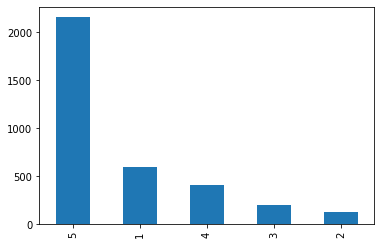

In [40]:
raw_data['Star Rating'].value_counts().plot(kind='bar')

In [41]:
is_bad_rating = raw_data['Star Rating'] <= 4
is_review_available = pd.notnull(raw_data['Review Text'])
is_no_review = pd.isnull(raw_data['Review Text'])
bad_ratting_no_review = raw_data[is_bad_rating & is_no_review]
bad_ratting_with_review = raw_data[is_bad_rating & is_review_available]
print("with review: ", len(bad_ratting_with_review), " vs no review: ", len(bad_ratting_no_review))

with review:  670  vs no review:  675


In [42]:
bad_ratting_with_review[['Star Rating', 'Review Text', 'App Version Name']][635:650]

,Star Rating,Review Text,App Version Name
3353,1,Tolol,NaN
3357,1,Kok saya ngga bisa download,NaN
3363,1,kak mohon diperbaiki ya. banyak yang susah log...,NaN
3365,1,nggak bisa masuk,6.0.24
3366,1,"Ini gimana cara daftarnya sih, udah berulang ""...",NaN
3367,1,Gak isok login cok,6.0.24
3370,1,"Aplikasi ngga bisa login,kata sandi salah melu...",NaN
3374,1,Gak ada kelas smp,6.0.24
3381,4,Saya lupa password quipper gimana cara tau pas...,NaN
3385,4,Aplikasi ini mudah.... Untuk di pakai buat murid,NaN


In [43]:
def check_review_text(text):
    if (isinstance(text, pd.Series)):
        return ' '.join(text)
    else:
         return text   

In [44]:
review_text =  bad_ratting_with_review['Review Text'] 
# print(check_review_text(review_text[163]))
# for review in review_text:
#     text = check_review_text(review)
#     print(text)
list_text = map(check_review_text, review_text)
print(len(list(list_text)), len(review_text))

670 670
